<h1> Loan Prediction Problem </h1>
    <h1> The Problem Statement </h1>
    <p> Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. </p>
    <p> It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). </p>
    <p> <b>Binary Classification</b> : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc. </p>
    <p><b>Multiclass Classification</b> : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc. </p>
    <p> Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank. </p>

<h1> The Hypothesis Generation </h1>

<p> This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the Loan Approval (dependent variable for this loan prediction problem): </p>

<p> Salary: Applicants with high income should have more chances of loan approval. </p>
<p>Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.</p>
<p>Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high. </p>
<p>Loan term: Loan for less time period and less amount should have higher chances of approval.</p>
<p>EMI: Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval. </p>

<p> We will try to validate each of these hypothesis based on the dataset. In the next section, we will have a look at the dataset. </p>

In [151]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import csv
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

<h1> Data </h1>

<p> For this practice problem, we have been given three CSV files: train, test and sample submission.

Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.
Sample submission file contains the format in which we have to submit our predictions. </p>

In [203]:
#reads in csv files train and test
train=pd.read_csv('train.csv') 
#print(train)
test=pd.read_csv('test.csv') 
#print(test)

#making copies of two files, the origionals
train_original=train.copy()
test_original=test.copy()

<h1> Undertanding the Data </h1>

<p> In this section, we will look at the structure of the train and test datasets. Firstly, we will check the features present in our data and then we will look at their data types. </p>

<p> In train, we have 12 independent variables and 1 target variable, i.e. Loan_Status </p>
<p> We have similar features in the test dataset as the train dataset except the Loan_Status. We will predict the Loan_Status using the model built using the train data. </p>

<p> We can see there are three format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
int64: It represents the integer variables. ApplicantIncome is of this format.
float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History </p>

<p> Looking now at the shape of the dataset, We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset. </p>

In [204]:
#get data about the csv files 


print(train.columns)
print(test.columns)
print(train.dtypes)
print(train.shape)
print(test.shape)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object
(614, 13)
(367, 12)


In [158]:
#printing the first 10 rows of train
train.head(10)
#print(test.head(10))

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819


In [159]:
#printing the first 10 rows of test
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


<h1> A few inferences, you can draw by looking at the output of describe() function: </h1>

<p> LoanAmount has (614 – 592) 22 missing values. </p>
<p>Loan_Amount_Term has (614 – 600) 14 missing values.</p>
<p>Credit_History has (614 – 564) 50 missing values.</p>
<p>We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, <p>Credit_History has value 1 for those who have a credit history and 0 otherwise)</p>
<p>The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome</p>
    
    
<p>Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.</p>

In [163]:
#printing a summury of numerical fields of train and test (count.mean,max,min,std...)
print(train.describe())
print(test.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   84.037468          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.250000         360.00000   
50%        3812.500000        1188.500000  129.000000         360.00000   
75%        5795.000000        2297.250000  164.750000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  LoanAmount_log   TotalIncome  TotalIncome_log  
count      564.000000      614.000000    614.000000       614.000000  
mean         0.842199        4.862066   7024.705081         8.669414  
std          0.364878        0.496575   6458.663872         0.545102  
min          0.000000        2.197225   

<h1> Univariate Analysis </h1>

<p> In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually. For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable. </p>


In [178]:
#printing a summery of non-numerical fields using frequency distributions
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<h1> Target Variable</h1>
    
<p> We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.</p>

<p>Frequency table of a variable will give us the count of each category in that variable. </p>
<p> The loan of 422(around 69%) people out of 614 was approved. </p>

Y    422
N    192
Name: Loan_Status, dtype: int64
Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


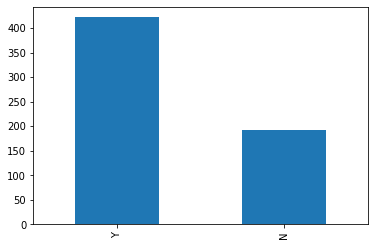

In [209]:
#printing a summery of non-numerical fields using frequency distributions
print(train['Loan_Status'].value_counts())

#normalize set to true, to get proportions
print(train['Loan_Status'].value_counts(normalize=True))

train['Loan_Status'].value_counts().plot.bar()

<h1> Independent Variable (Categorical) </h1>

<p> It can be inferred from the below bar plots that: </p>

<p>80% applicants in the dataset are male.</p>
<p>Around 65% of the applicants in the dataset are married.</p>
<p>Around 15% applicants in the dataset are self employed.</p>
<p>Around 85% applicants have repaid their debts.</p>


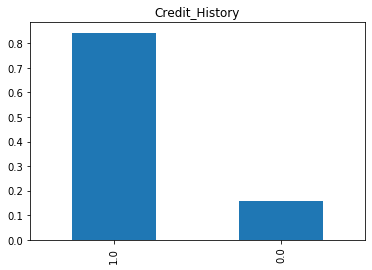

In [211]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

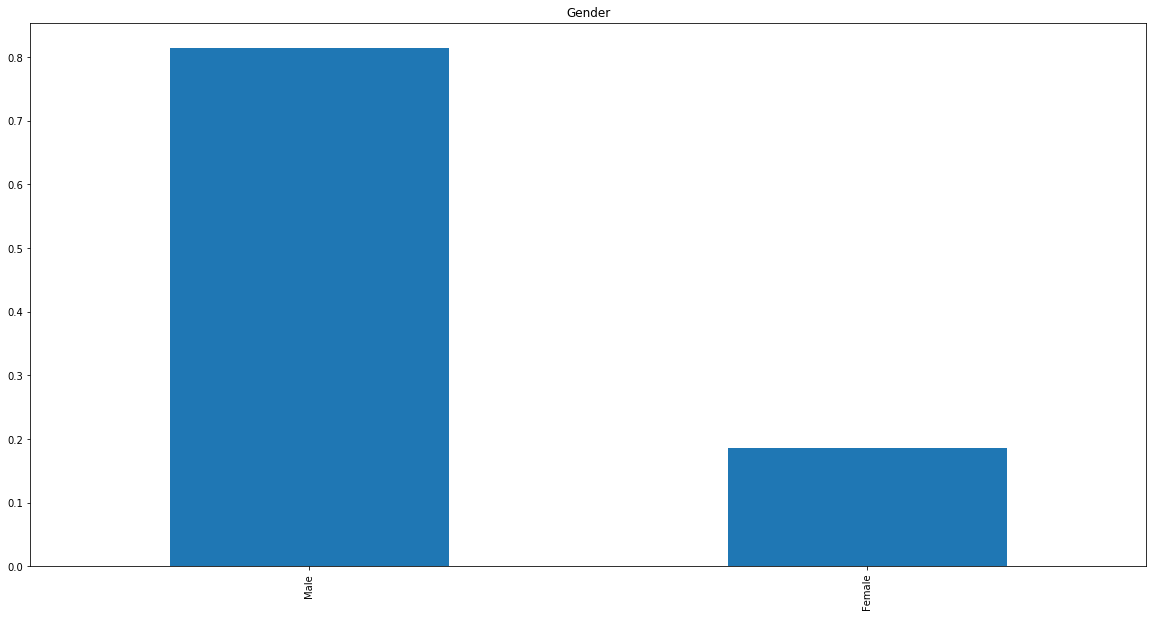

In [214]:
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 

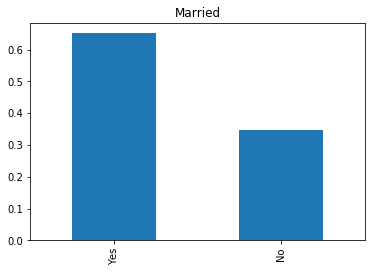

In [213]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 

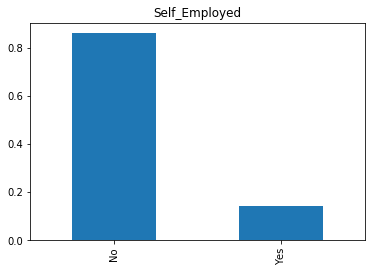

In [212]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

<h1> Independent Variable (Ordinal) </h1>

<p> Following inferences can be made from the below bar plots: </p>

<p>Most of the applicants don’t have any dependents.</p>
<p>Around 80% of the applicants are Graduate.</p>
<p>Most of the applicants are from Semiurban area. </p>

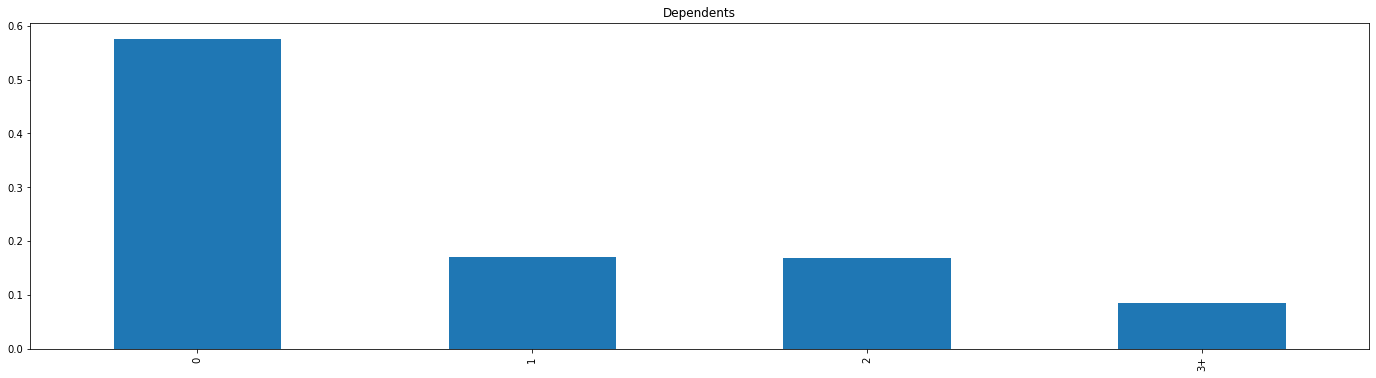

In [215]:
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 

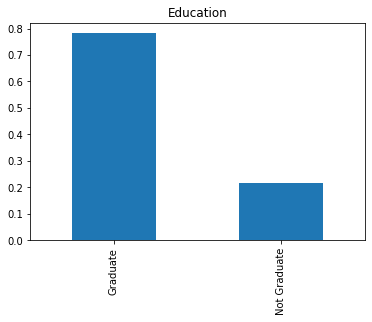

In [216]:
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 

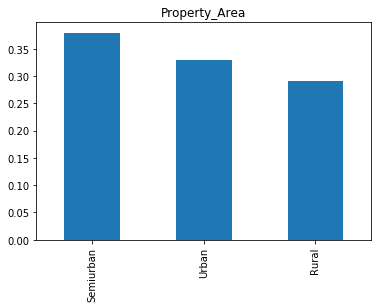

In [217]:
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 

<h1> Independent Variable (Numerical) </h1>

<p> It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed. </p>

<p>The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:</p>

<p> We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers. </p>

<p> Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly. </p>

<p> This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education: </p>

<p> We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers </p>

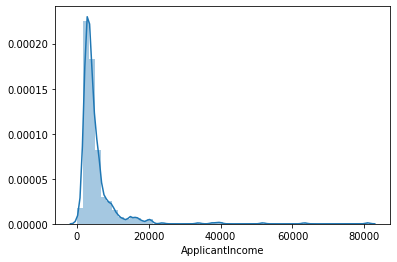

In [218]:
sns.distplot(train['ApplicantIncome'])

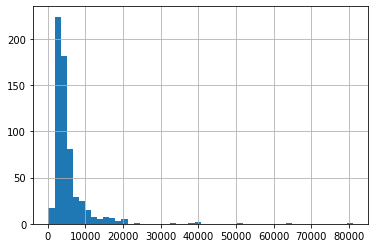

In [180]:
#printing the distributions of variabes, in histograms, the 50 divides the area into 50 equal parts
train['ApplicantIncome'].hist(bins=50)

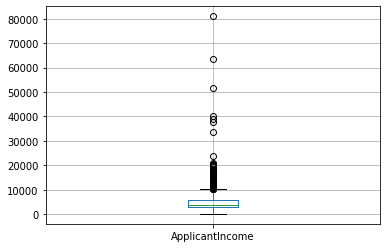

In [183]:
#printing the distributions of variabes, in box plots
train.boxplot(column='ApplicantIncome')

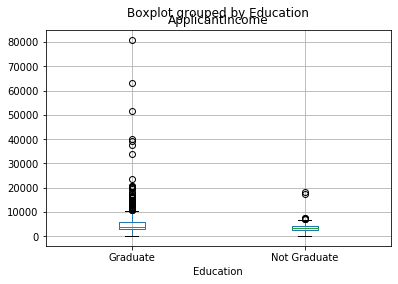

In [184]:
#segregating applicants income by their level of education
train.boxplot(column='ApplicantIncome', by = 'Education')

<p> We see a similar distribution as that of the applicant income for coapplicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed. </p>

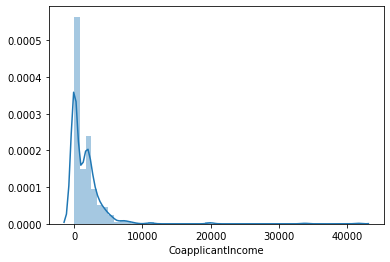

In [219]:
#now look at coapplicant income 

sns.distplot(train['CoapplicantIncome'])

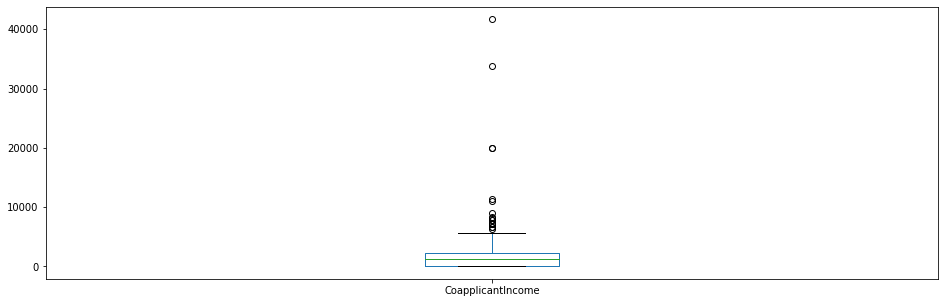

In [220]:
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 

<p> Now look at Loan Amount </p>

<p> We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections. </p>

<p>Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values, which demand deeper understanding. We will take this up in coming sections. </p>

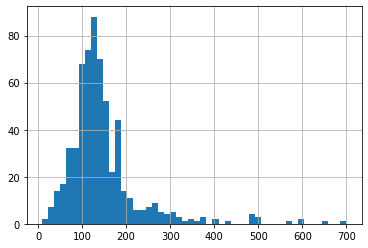

In [185]:
#printing the distributions of variabes, in histograms, the 50 divides the area into 50 equal parts
train['LoanAmount'].hist(bins=50)

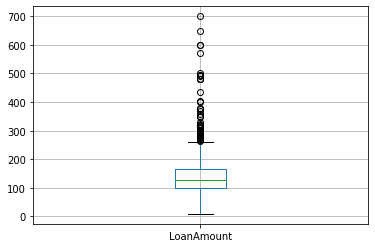

In [187]:
#printing the distributions of variabes, in box plots
train.boxplot(column='LoanAmount')

In [189]:
#now we are doing categorical variable analysis
temp1 = train['Credit_History'].value_counts(ascending=True) #Gets the frequency of credit history
temp2 = train.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()) #gets the probability of a loan based on credit  history

print ('Frequency Table for Credit History:') 
print (temp1)
print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3ED431288>],
      dtype=object)

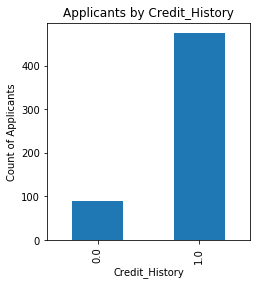

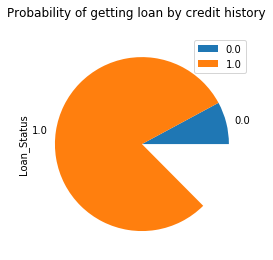

In [193]:
#now we plot the above results into a bar and pie graph

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

temp2.plot(kind = 'pie', subplots='True', title='Probability of getting loan by credit history')

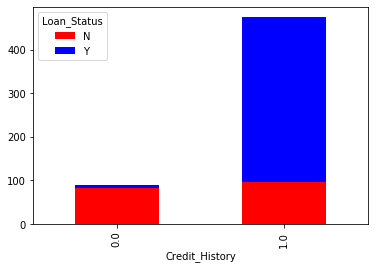

In [194]:
#can view above resuts together in stacked bar graph

temp3 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

<h1> Bivariate Analysis </h1>

<h1> Categorical Independent Variable vs Target Variable </h1>
    
    
<p>First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. </p>

<p> It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans. </p>

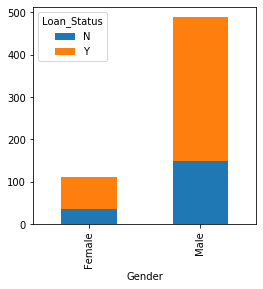

In [233]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.plot(kind="bar", stacked=True, figsize=(4,4))

<p> Proportion of married applicants is higher for the approved loans.</p>
<p>Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.</p>
<p>There is nothing significant we can infer from Self_Employed vs Loan_Status plot.</p>

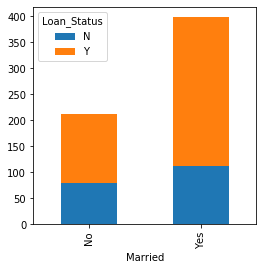

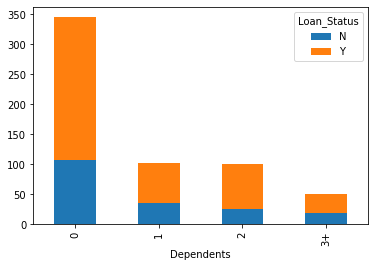

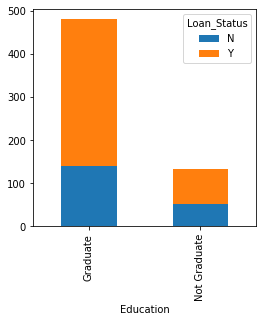

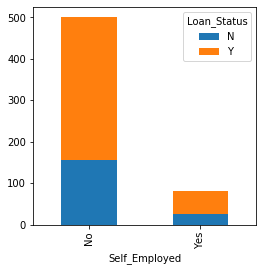

In [237]:
Married=pd.crosstab(train['Married'],train['Loan_Status']) 
Married.plot(kind="bar", stacked=True, figsize=(4,4))


Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.plot(kind="bar", stacked=True)


Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.plot(kind="bar", stacked=True, figsize=(4,4))


Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Self_Employed.plot(kind="bar", stacked=True, figsize=(4,4)) 


<p> Now we will look at the relationship between remaining categorical independent variables and Loan_Status. </p>

<p> It seems people with credit history as 1 are more likely to get their loans approved. </p>
<p>Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.</p>

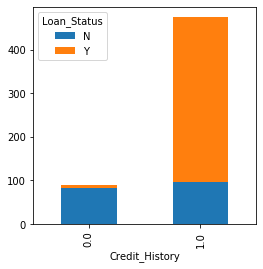

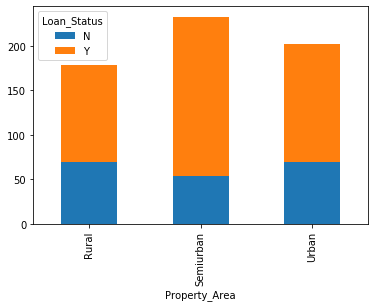

In [239]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Credit_History.plot(kind="bar", stacked=True, figsize=(4,4))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Property_Area.plot(kind="bar", stacked=True) 

<h1> Numerical Independent Variable vs Target Variable </h1>

<p> We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved. </p>

<p> Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin. </p>



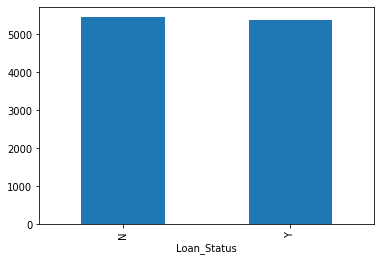

In [240]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

<p>It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.</p>

<p>We will analyze the coapplicant income and loan amount variable in similar manner.</p>

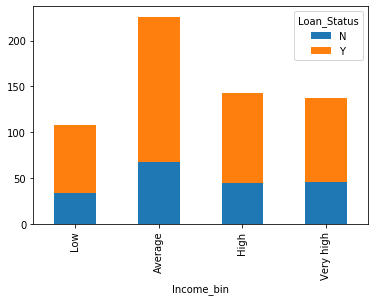

In [243]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.plot(kind="bar", stacked=True) 

<p> It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.</p>

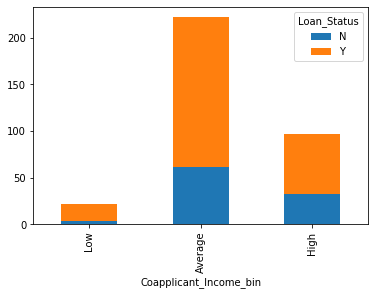

In [244]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.plot(kind="bar", stacked=True) 

<p> Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status. </p>

<p> We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income. </p>



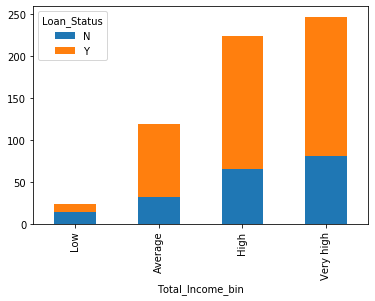

In [245]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.plot(kind="bar", stacked=True) 


<p> Let’s visualize the Loan amount variable. </p>

<p> It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less. </p>

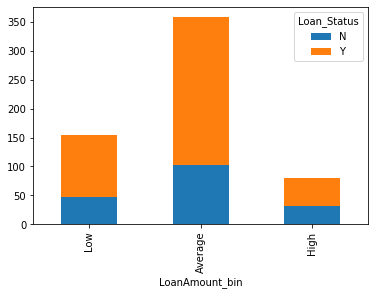

In [246]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.plot(kind="bar", stacked=True)

<p> Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.</p>

<p> We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome. </p>

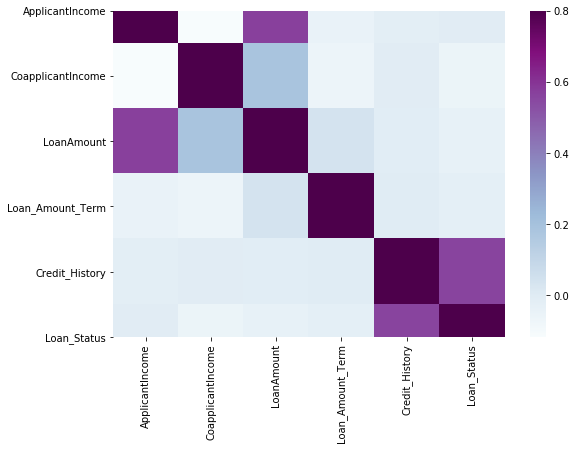

In [256]:
matrix = train.corr()
ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

<h1> Data Munging </h1>

<p> There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables. </p>
<p>While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately. </p>

<h1>Check missing values in the dataset</h1>
<p>Let us look at missing values in all the variables because most of the models don’t work with missing data and even if they do, imputing them helps more often than not. So, let us check the number of nulls / NaNs in the dataset</p>

<p>We can consider these methods to fill the missing values:</p>

<p>For numerical variables: imputation using mean or median</p>
<p>For categorical variables: imputation using mode</p>

<p>Though the missing values are not very high in number, but many variables have them and each one of these should be estimated and added in the data. </p>

<p> Remember that missing values may not always be NaNs. For instance, if the Loan_Amount_Term is 0, does it makes sense or would you consider that missing? I suppose your answer is missing and you’re right. So we should check for values which are unpractical.</p>

<p> There are numerous ways to fill the missing values of loan amount – the simplest being replacement by mean</p>



In [260]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<p>There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.<p>


In [261]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

<p> Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable. </p>

<p> It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable. </p>

In [262]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [263]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

<p> Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.</p>

In [264]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [266]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [267]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

<h1> Outlier Treatment </h1>

<p> As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let's examine what can happen to a data set with outliers. For the sample data set:</p>

<p>1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4</p>

<p>We find the following: mean, median, mode, and standard deviation</p>

<p>Mean = 2.58</p>

<p>Median = 2.5</p>

<p>Mode = 2</p>

<p>Standard Deviation = 1.08</p>

<p>If we add an outlier to the data set:</p>

<p>1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 400 </p>

<p>The new values of our statistics are: </p>

<p>Mean = 35.38 </p>

<p>Median = 2.5 </p>

<p>Mode = 2 </p>

<p>Standard Deviation = 114.74 </p>

<p>It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets. </p>

<p>Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution. </p>

<p>Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously. </p>


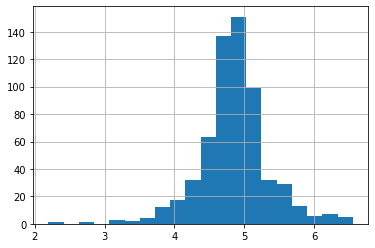

In [271]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

<p>Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.</p>

<h1> Evaluation Metrics for Classification Problems </h1> 

The process of model building is not complete without evaluation of model’s performance. Suppose we have the predictions from the model, how can we decide whether the predictions are accurate? We can plot the results and compare them with the actual values, i.e. calculate the distance between the predictions and actual values. Lesser this distance more accurate will be the predictions. Since this is a classification problem, we can evaluate our models using any one of the following evaluation metrics:

Accuracy: Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. This is how a confusion matrix looks like:

True Positive - Targets which are actually true(Y) and we have predicted them true(Y)
True Negative - Targets which are actually false(N) and we have predicted them false(N)
False Positive - Targets which are actually false(N) but we have predicted them true(T)
False Negative - Targets which are actually true(T) but we have predicted them false(N)
Using these values, we can calculate the accuracy of the model. The accuracy is given by:


Precision: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true.
Precision = TP / (TP + FP)

Recall(Sensitivity) - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’.
Recall = TP / (TP + FN)

Specificity - It is a measure of how many observations of false class are labeled correctly.
Specificity = TN / (TN + FP)

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

ROC curve
Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).
The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.
This is how a ROC curve looks like:

The area of this curve measures the ability of the model to correctly classify true positives and true negatives. We want our model to predict the true classes as true and false classes as false.
So it can be said that we want the true positive rate to be 1. But we are not concerned with the true positive rate only but the false positive rate too. For example in our problem, we are not only concerned about predicting the Y classes as Y but we also want N classes to be predicted as N.
We want to increase the area of the curve which will be maximum for class 2,3,4 and 5 in the above example.
For class 1 when the false positive rate is 0.2, the true positive rate is around 0.6. But for class 2 the true positive rate is 1 at the same false positive rate. So, the AUC for class 2 will be much more as compared to the AUC for class 1. So, the model for class 2 will be better.
The class 2,3,4 and 5 model will predict more accurately as compared to the class 0 and 1 model as the AUC is more for those classes.
At the competition’s page, it has been mentioned that our submission data would be evaluated based on the accuracy. Hence, we will use accuracy as our evaluation metric.

<h1>  Building a Predictive Model </h1>

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [275]:
y = 'hi'
x = 'ok' 
z = x + y
print (z)

okhi


In [278]:
def concat(str):
    y = str + str
    return y

x = concat(here,there)
print(x)

NameError: name 'here' is not defined